<h1 align="center">*** NOTE ***<h3>
<h2 align="center">Some of the cells in this notebook call functions which require user input!!!<h3>
<h3 align="center">If you select "Run All" from the menu bar then you will be prompted to input the requested information for each of those cells.<h3>

### The input field provides the list of valid symbols and years to choose from and they are as follows: 
* Valid inputs for "symbol" are: (AAPL, AMD, AMZN, CSCO, META, MSFT, NFLX, QCOM, SBUX, TSLA)
* Valid inputs for "year" are : (2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022)

### The following Markdown cells are provided to meet the following project requirement:
1. Write markdown cells in Jupyter explaining your thought process and code.


### The following cell performs the overall imports for the custom functions.

In [1]:
import math
from datetime import date, datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sbn

pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)

### The following cell defines the function to read in ten years of historic stock data from the file associated with the user's input and returns a Pandas dataframe.
<p> This function asks the user to enter a valid stock symbol from the list provided. Valid symbols can be entered in lower, upper or mixed case.  
<br />It takes that input and reads in data from the corrosponding local .csv file. It then cleans/transforms the data into a pandas dataframe.
<br />The user only gets three attempts to enter a valid stock symbol from the list provided and then the function terminates and returns a message.
<br />If no corrosponding file is found the function terminates and returns a message.

###It meets the following project requirements: 
1. Read in data from a local csv, excel file, json, or any other file type.
2. Use custom functions or lambdas to perform specific operations to clean or manipulate your data, return those values, then use them in other parts of your project.

In [2]:
def get_data_local_csv():
    """
    Request user input. Read in then clean/transform data from a local CSV file.

    This function asks the user to imput a valid stock symbol from the list provided.
    Valid symbols can be entered in lower, upper or mixed case. 
    It takes that input and reads in data from the corrosponding local .csv file. 
    It then cleans/transforms the data into a pandas dataframe.
    The user only gets three attempts to enter a valid stock symbol from the list provided and 
    then the function terminates and returns a message.
    If no corrosponding file is found the function terminates and returns a message.
    

    Parameters
    ----------
    None

    Returns
    -------
    pandas dataframe

    Examples
    --------
    MSFT, AAPL
    """ 
    
    try: # Handles the condition of no dataframe returned (UnboundLocalError) due to no valid input after 3 attempts or file not found error.
        try: # Handles the conditions of a either a valid or invalid input or a FileNotFound error.
            for x in range(3): # Sets the input attempt range to 3 to avoid an infinite run condition.
                symbols = ['AAPL', 'AMD', 'AMZN', 'CSCO', 'META', 'MSFT', 'NFLX', 'QCOM', 'SBUX', 'TSLA'] # List of valid stock symbols for input.
                symbol = input("Please enter one of the following symbols!" + str(symbols)).upper() # User input statement.
                print("User selected " + symbol)
                if symbol in symbols: # Checks for valid input.
                    df = pd.read_csv('assets/HistoricalData_' + symbol + '.csv') # Read in data from local CSV file.
                    df['Symbol'] = symbol # Adds the "Symbol" column to the dataframe.
                    df['Open'] = df['Open'].str.replace("$", '', regex=True).astype(float) # Removes the $ from the data in the column and sets type to float.
                    df['High'] = df['High'].str.replace("$", '', regex=True).astype(float) # Removes the $ from the data in the column and sets type to float.
                    df['Low'] = df['Low'].str.replace("$", '', regex=True).astype(float) # Removes the $ from the data in the column and sets type to float.
                    df['Close/Last'] = df['Close/Last'].str.replace("$", '', regex=True).astype(float) # Removes the $ from the data in the column and sets type to float.
                    df.rename(columns={'Close/Last': 'Close'}, inplace=True) # Renames "Close/Last" column to "Close"
                    df['Date'] = pd.to_datetime(df['Date']) # Sets "Date" column to type datetime.
                    df['Year'] = df['Date'].dt.year # The next 6 rows seperates the "Date" column into it's individual components.
                    df['Month'] = df['Date'].dt.month
                    df['Day'] = df['Date'].dt.day
                    df['Week Num'] = df.Date.apply(lambda x:x.isocalendar()[1])
                    df['Day Num'] = df['Date'].dt.day_of_week
                    df['Day Name'] = df['Date'].dt.day_name()
                    break # Breaks loop on successful execution.
                elif x < 2: # Checks range variable for value on unsuccessful execution.
                    print("You have entered an invalid symbol! Please try again!") 
                else: # Informs user that the function is terminating after 3 invalid entries.
                    print("Function terminates after three invalid entries!")
                
        except FileNotFoundError: 
            print("File Not Found!")
        return df # Returns pandas dataframe on successful execution.

    except UnboundLocalError:
        print("No dataframe returned!")    

### The following cell defines the function to filter the dataframe by the symbol and year associated with the user's input.

This function calls the get_data_local_csv() function and then asks the user to enter a valid symbol and year from the list provided. It takes that input and filters the current dataframe. 
<br />The user only gets three attempts to enter a valid year from the list provided then the function terminates and returns a message. If the dataframe is not returned a message is printed.

In [3]:
def filter_by_year():
    """
    Requests user input. Reads in then cleans/transforms data from a local CSV file.

    This function calls the get_data_local_csv() function and then asks the user to imput a valid symbol and year from the list provided. 
    It takes that input and filters the current dataframe. 
    The user only gets three attempts to enter a valid year from the list provided and 
    then the function terminates and returns a message.
    If the dataframe is not returned a message is printed.

    Parameters
    ----------
    None

    Returns
    -------
    pandas dataframe

    Examples
    --------
    2012, 2022
    """

    df = get_data_local_csv()
    try:
        for x in range(3): # Sets the input attempt range to 3 to avoid an infinite run condition.
            years = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'] # List of valid years for input.
            year = input("Please enter one of the following years!" + str(years)) # User input statement.
            print("User selected " + year)
            if year in years: # Checks for valid input.
                is_year = df["Year"] == int(year) # Filter dataframe to only requested year.
                df_yr = df[is_year]
                break # Breaks loop on successful execution.
            elif x < 2: # Checks range variable for value on unsuccessful execution.
                print("You have entered an invalid year! Please try again!") 
            else: # Informs user that the function is terminating after 3 invalid entries.
                print("Function terminates after three invalid entries!")

        return df_yr # Returns pandas dataframe on successful execution.

    except UnboundLocalError:
        print("No dataframe returned!")  

### The following cell defines the function to read in ten years of historic stock data from the file associated with the user's input, creates a Pandas dataframe, performs specific calculations on the data and prints the results.
### It meets the following project requirements:
1. Do 5 basic calculations with Pandas, like finding the sum(), median(), mean(), or mode() of a column.
2. Write custom functions to operate on your data.

In [4]:
def hist_calc():
    """
    Request user input. Read in then clean/transform/calculate data from a local CSV file.

    This function asks the user to imput a valid stock symbol from the list provided.
    Valid symbols can be entered in lower, upper or mixed case. 
    It takes that input and reads in data from the corrosponding local .csv file. 
    It then cleans/transforms the data into a pandas dataframe, performs specific calculations
    and prints the result.
    The user only gets three attempts to enter a valid stock symbol from the list provided and 
    then the function terminates and returns a message.
    If no corrosponding file is found the function terminates and returns a message.
    

    Parameters
    ----------
    None

    Returns
    -------
    pandas dataframe

    Examples
    --------
    MSFT, AAPL
    """
    
    df = get_data_local_csv() # Reads in 10 years of historical data on selected symbol.
    first_close = df['Close'].values[-1] # Retrieve values.
    last_close = df['Close'].values[0]
    historic_return = (((last_close - first_close) / first_close) * 100).round() # First calculation.
    print("The historical rate of return is " + "%" + str(historic_return))
    avg_open = df['Open'].mean()# Second Calculation.
    avg_close = df['Close'].mean()# Third Calculation.
    avg_vol = df['Volume'].mean()# Fourth Calculation.
    df['HL_Delta'] = df['High'] - df['Low'] 
    avg_delta = df["HL_Delta"].mean()#Fifth Calculation
    result1 = round(avg_open, 2)
    result2 = round(avg_close, 2)
    result3 = round(avg_vol, 2)
    result4 = round(avg_delta, 2)
    print("The average opening price is $" + str(result1))
    print("The average closing price is $" + str(result2))
    print("The average volume is " + str(result3))
    print("The average difference between the High and Low price is $" + str(result4))
    return df

### The following cell defines the function to read in one year of historic stock data from the file associated with the user's input, creates a Pandas dataframe, performs specific calculations on the data and prints the results.

In [5]:
def annual_calc():
    """
    Request user input. Read in then clean/transform/calcualte data from a local CSV file.

    This function asks the user to imput a valid stock symbol and year from the lists provided.
    Valid symbols can be entered in lower, upper or mixed case.
    It takes that input and reads in data from the corrosponding local .csv file. 
    It then cleans/transforms the data into a pandas dataframe, performs specific calculations
    and prints the result.
    The user only gets three attempts to enter a valid stock symbol from the list provided and 
    then the function terminates and returns a message.
    If no corrosponding file is found the function terminates and returns a message.
    

    Parameters
    ----------
    None

    Returns
    -------
    pandas dataframe

    Examples
    --------
    MSFT, AAPL
    """
    
    df = filter_by_year() # Reads in one year of historical data on selected symbol and year.
    first_close = df['Close'].values[-1] # Retrieve values.
    last_close = df['Close'].values[0]
    annual_return = (((last_close - first_close) / first_close) * 100).round()# First calculation.
    print("The annual rate of return is " + "%" + str(annual_return))
    avg_open = df['Open'].mean()# Second Calculation.
    avg_close = df['Close'].mean()# Third Calculation.
    avg_vol = df['Volume'].mean()# Fourth Calculation.
    df['HL_Delta'] = df['High'] - df['Low'] 
    avg_delta = df["HL_Delta"].mean()#Fifth Calculation
    result1 = round(avg_open, 2)
    result2 = round(avg_close, 2)
    result3 = round(avg_vol, 2)
    result4 = round(avg_delta, 2)
    print("The average opening price is $" + str(result1))
    print("The average closing price is $" + str(result2))
    print("The average volume is " + str(result3))
    print("The average difference between the High and Low price is $" + str(result4))
    return df

### The following cel defines a function which plots price to volume data points associated with the ten year historical data associated with the symbol entered by the user.
### It meets the following project requirements:
1. Make 2 basic plots with matplotlib, seaborn, or any other kind of visualization library that you think looks interesting.

In [6]:
def plot_hist_price_vol():

    df = hist_calc()
    # Create the format dictionaries for plots:
    colors = {'red': '#ff207c', 'grey': '#42535b', 'blue': '#207cff', 'orange': '#ffa320', 'green': '#3CB371'}
    config_ticks = {'size': 14, 'color': colors['grey'], 'labelcolor': colors['grey']}
    config_title = {'size': 20, 'color': colors['green'], 'ha': 'center', 'va': 'top'}
    
    fig, axes = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 2]}) # Sets size ratio between plots.
    fig.tight_layout(pad=3)

    plt.rc('figure', figsize=(40, 20)) # Sets plot size overall.

    plt.title('Historical Price to Volume', fontdict=config_title) # Creates plot title.
    
    # Creats variables with data points for plotting:
    date = df['Date']
    close = df['Close']
    vol = df['Volume']
    
    # Formats top plot:
    plot_price = axes[0]
    plot_price.plot(date, close, color=colors['blue'], linewidth=2, label='Price')
    
    # Formats bottom plot:
    plot_vol = axes[1]
    plot_vol.bar(date, vol, width=15, color='darkgrey')

    # Sets axis parameters for top plot:
    plot_price.yaxis.tick_right()
    plot_price.tick_params(axis='both', **config_ticks)
    plot_price.set_ylabel('Price (in USD)', fontsize=20)
    plot_price.yaxis.set_label_position("right")
    plot_price.yaxis.label.set_color(colors['grey'])
    plot_price.grid(axis='y', color='gainsboro', 
    linestyle='-', linewidth=1.0)
    plot_price.set_axisbelow(True)
    
    # Sets axis parameters for bottom plot:
    plot_vol.yaxis.tick_right()
    plot_vol.tick_params(axis='both', **config_ticks)
    plot_vol.set_ylabel('Volume (in Millions)', fontsize=20)
    plot_vol.yaxis.set_label_position("right")
    plot_vol.yaxis.label.set_color(colors['grey'])
    plot_vol.grid(axis='y', color='gainsboro', 
    linestyle='-', linewidth=1.0)
    plot_vol.set_axisbelow(True)
    
    return

    

### The following cell simply calls the plot_hist_price_vol() function.

User selected AMD
The historical rate of return is %1893.0
The average opening price is $31.57
The average closing price is $31.56
The average volume is 49994203.31
The average difference between the High and Low price is $1.34


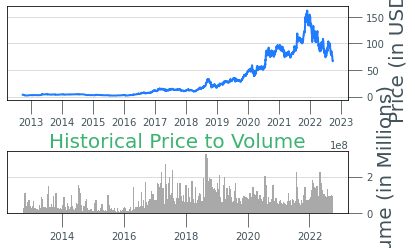

In [7]:
plot_hist_price_vol()

### The following cel defines a function which plots annual Open, High, Low, and Close data points associated with the symbol and year entered by the user.
### It meets the following project requirements:
1. Make 2 basic plots with matplotlib, seaborn, or any other kind of visualization library that you think looks interesting.

In [8]:
def plot_annual_ohlc():
    
    df = annual_calc()

    df.reset_index(inplace=True)

    # Creates NumPy array to plot multiple values on one bar.
    x = np.arange(0,len(df))
    fig, ax = plt.subplots(1, figsize=(40,15))
    for idx, val in df.iterrows():
        plt.plot([x[idx], x[idx]], [val['Low'], val['High']])
        plt.plot([x[idx], x[idx]-0.1], 
             [val['Open'], val['Open']], 
             color='black')
    plt.plot([x[idx], x[idx]+0.1], 
             [val['Close'], val['Close']], 
             color='black')

    #Sets plot title and labels:
    plt.title("One Year OHLC", fontsize=24)
    plt.xlabel("Date", fontsize=24)
    plt.ylabel("OHLC", fontsize=24)

    # Sets index from oldest to newest date.
    plt.xlim(df.index[-1], df.index[0])

    # Sets x axis ticks.
    plt.xticks(x[::10], df.Date.dt.date[::10], fontsize= 14, rotation= 45)

    plt.show()
    
    

    

### The following cell simply calls the plot_annual_ohlc() function.

User selected QCOM
User selected 2020
The annual rate of return is %72.0
The average opening price is $102.3
The average closing price is $102.31
The average volume is 9807816.77
The average difference between the High and Low price is $3.2


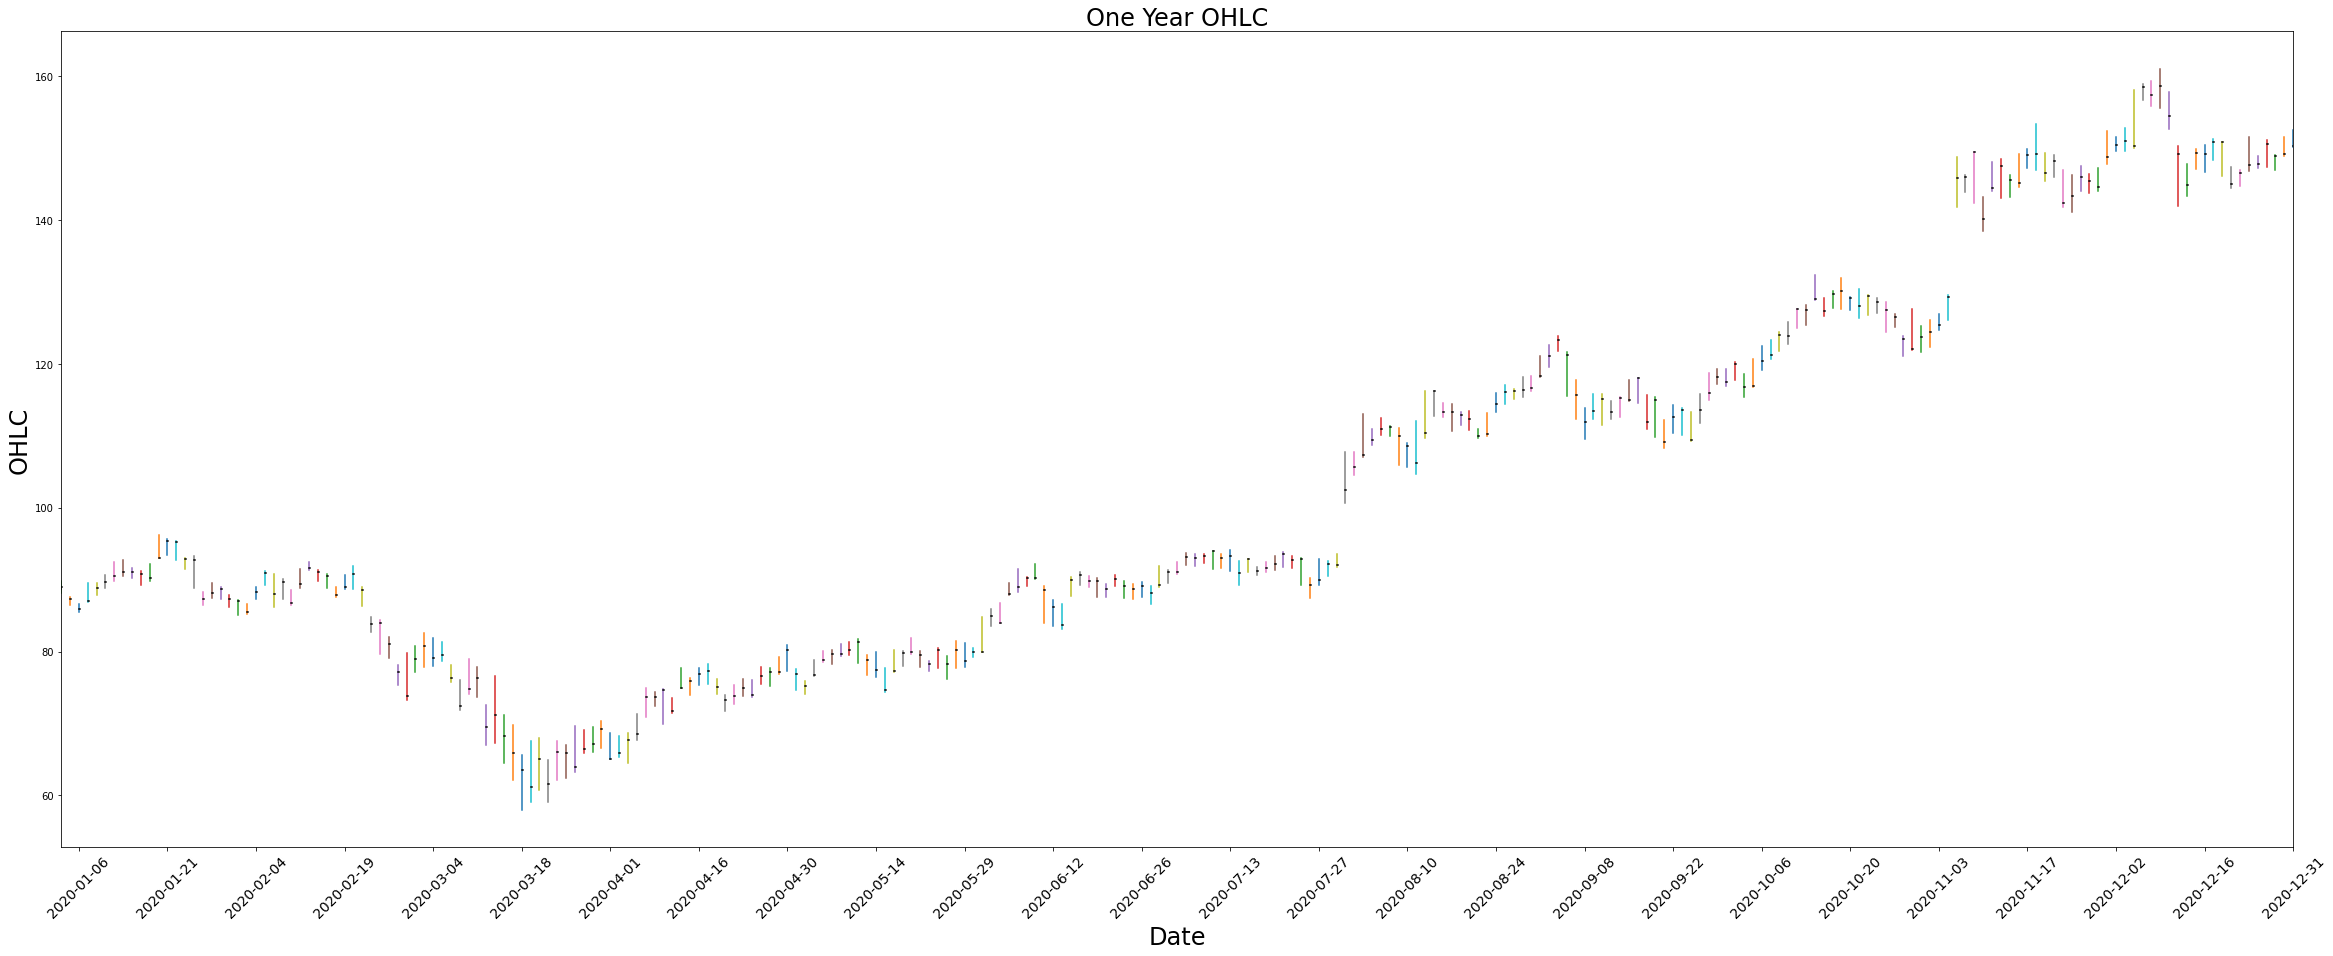

In [9]:
plot_annual_ohlc()

### The following cel defines a function which plots the one year daily delta between the  high and low price data points associated with the symbol and year entered by the user.
### It meets the following project requirements:
1. Make 2 basic plots with matplotlib, seaborn, or any other kind of visualization library that you think looks interesting.

In [10]:
def plot_annual_calc():
    
    df = annual_calc()
    fig, ax = plt.subplots(figsize=(40, 20))
    sbn.set(font_scale= 2)
    sbn.lineplot(data=df, x="Date", y="HL_Delta").set(title= "High Low Delta")
    plt.xlabel("Date", fontsize= 24)
    plt.ylabel("HL Delta", fontsize= 24)
    return

### The following cell simply calls the plot_annual_calc() function.

User selected TSLA
User selected 2021
The annual rate of return is %45.0
The average opening price is $259.95
The average closing price is $260.0
The average volume is 82193304.87
The average difference between the High and Low price is $11.48


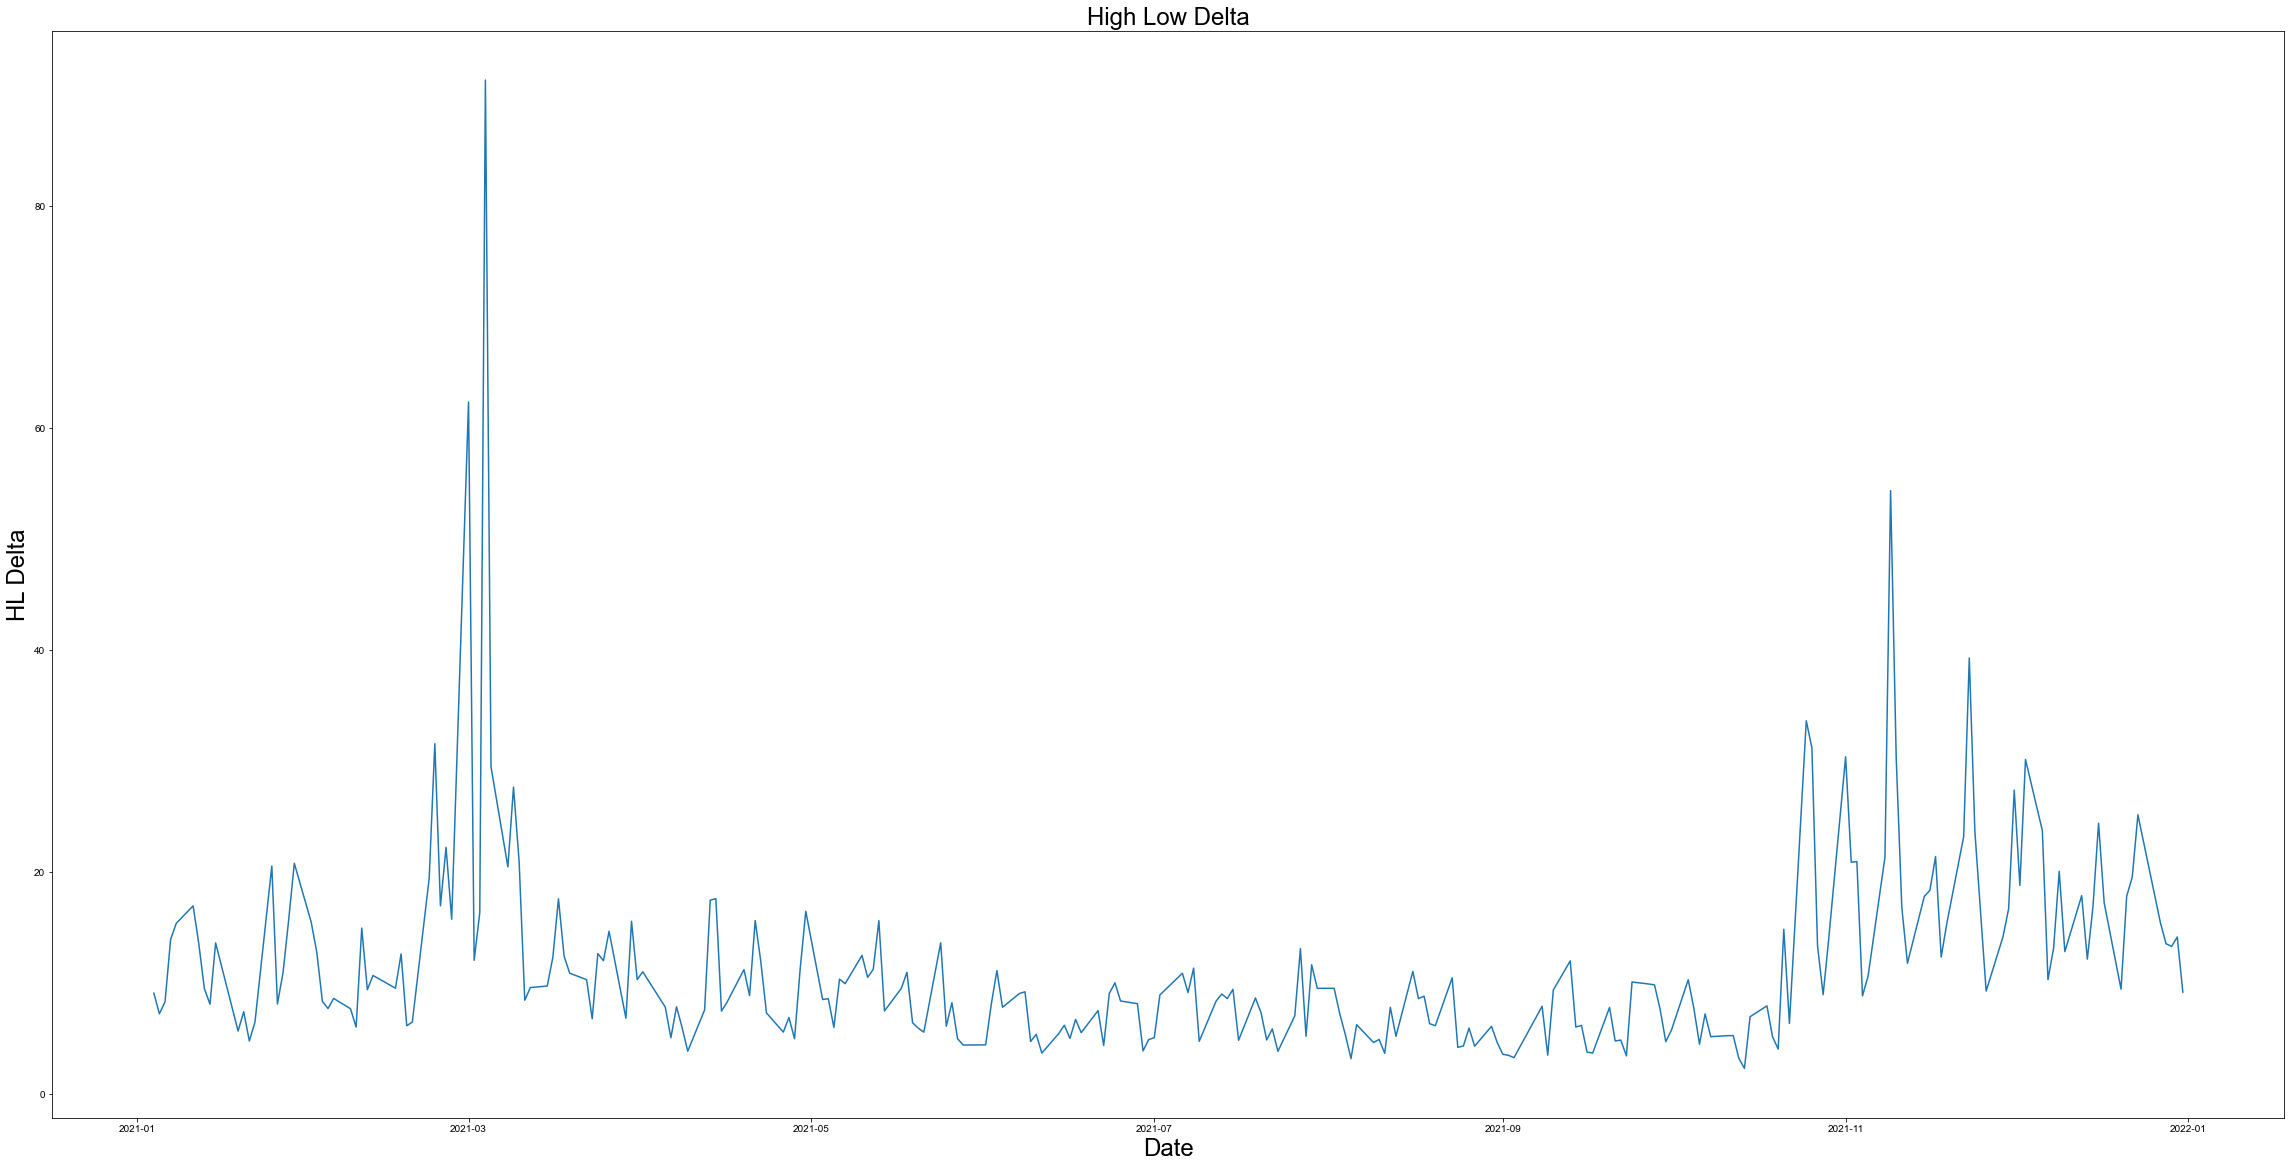

In [11]:
plot_annual_calc()